## Access Satellite GHRSST L3S 1Day Day and Night time Single Sensor Southernocean data in Zarr
A jupyter notebook to show how to access and plot the AODN satellite_ghrsst_l3s_1day_daynighttime_single_sensor_southernocean dataset available as a [Zarr](https://zarr.dev/) dataset on S3.

More information about the dataset available at [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/165a23d7-5ef3-4cab-9e02-90c8adb941dd).

📌 The point of truth for this notebook is [on GitHub](https://github.com/aodn/aodn_cloud_optimised/tree/main/notebooks/satellite_ghrsst_l3s_1day_daynighttime_single_sensor_southernocean.ipynb).

In [1]:
dataset_name = "satellite_ghrsst_l3s_1day_daynighttime_single_sensor_southernocean"

## Install/Update packages and Load common functions

In [3]:
import os, requests, importlib.util

open('setup.py', 'w').write(requests.get('https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/setup.py').text)

spec = importlib.util.spec_from_file_location("setup", "setup.py")
setup = importlib.util.module_from_spec(spec)
spec.loader.exec_module(setup)

setup.install_requirements()
setup.load_dataquery()

Using CPython 3.12.6 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Audited 234 packages in 29ms


In [4]:
from DataQuery import GetAodn

# Understanding the Dataset

In [6]:
# remote zarr dataset
aodn = GetAodn()
dname = f'{dataset_name}.zarr'
%time aodn_dataset = aodn.get_dataset(dname)

<xarray.Dataset> Size: 320GB
Dimensions:                          (time: 100, lat: 2500, lon: 10000)
Coordinates:
  * lat                              (lat) float32 10kB -27.51 -27.53 ... -77.49
  * lon                              (lon) float32 40kB 2.51 2.53 ... 202.5
  * time                             (time) datetime64[ns] 800B 1992-03-21T11...
Data variables: (12/16)
    dt_analysis                      (time, lat, lon) float64 20GB ...
    l2p_flags                        (time, lat, lon) float64 20GB ...
    quality_level                    (time, lat, lon) float64 20GB ...
    satellite_zenith_angle           (time, lat, lon) float64 20GB ...
    sea_ice_fraction                 (time, lat, lon) float64 20GB ...
    sea_ice_fraction_dtime_from_sst  (time, lat, lon) float64 20GB ...
    ...                               ...
    sst_count                        (time, lat, lon) float64 20GB ...
    sst_dtime                        (time, lat, lon) float64 20GB ...
    sst_mean                         (time, lat, lon) float64 20GB ...
    sst_standard_deviation           (time, lat, lon) float64 20GB ...
    wind_speed                       (time, lat, lon) float64 20GB ...
    wind_speed_dtime_from_sst        (time, lat, lon) float64 20GB ...
Attributes: (12/50)
    Conventions:                      CF-1.6
    Metadata_Conventions:             Unidata Dataset Discovery v1.0
    Metadata_Link:                    TBA
    acknowledgment:                   Any use of these data requires the foll...
    cdm_data_type:                    grid
    comment:                          HRPT AVHRR experimental L3 retrieval pr...
    ...                               ...
    summary:                          A merged, day+night, multi-sensor L3S f...
    time_coverage_end:                19920321T141742Z
    time_coverage_start:              19920321T055509Z
    title:                            IMOS L3S Day and Night gridded multiple...
    uuid:                             be3fe28e-825d-44ac-b39f-b391d6e61207
    westernmost_longitude:            2.509999990463257

## Plot time coverage

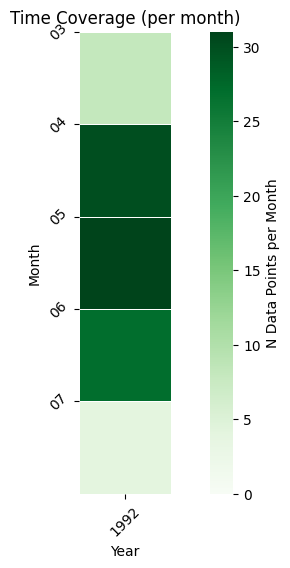

In [7]:
aodn_dataset.get_temporal_extent()

In [ ]:
aodn_dataset.plot_time_coverage()

## Timeseries at a point

In [8]:
%%time
%%time
time_series_df = aodn_dataset.get_timeseries_data(var_name='sea_surface_temperature', 
                                                  lat=-40, 
                                                  lon=130, 
                                                  date_start='1992-12-01', 
                                                  date_end='1996-03-31', 
                                                  lon_name_override="lon", 
                                                  lat_name_override="lat").plot_timeseries()

ValueError: Start time 1992-12-01 00:00:00 is out of bounds. Dataset time extent is (1992-03-21 11:10:00, 1992-07-04 11:10:00)

## Plot a gridded variable

Nearest date in dataset: <xarray.DataArray 'time' ()> Size: 8B
array('1992-07-04T11:10:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 1992-07-04T11:10:00
Attributes:
    axis:           T
    comment:        A typical reference time for data
    long_name:      reference time of sst file
    standard_name:  time
Variable Long Name: sea surface foundation temperature


/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:880: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


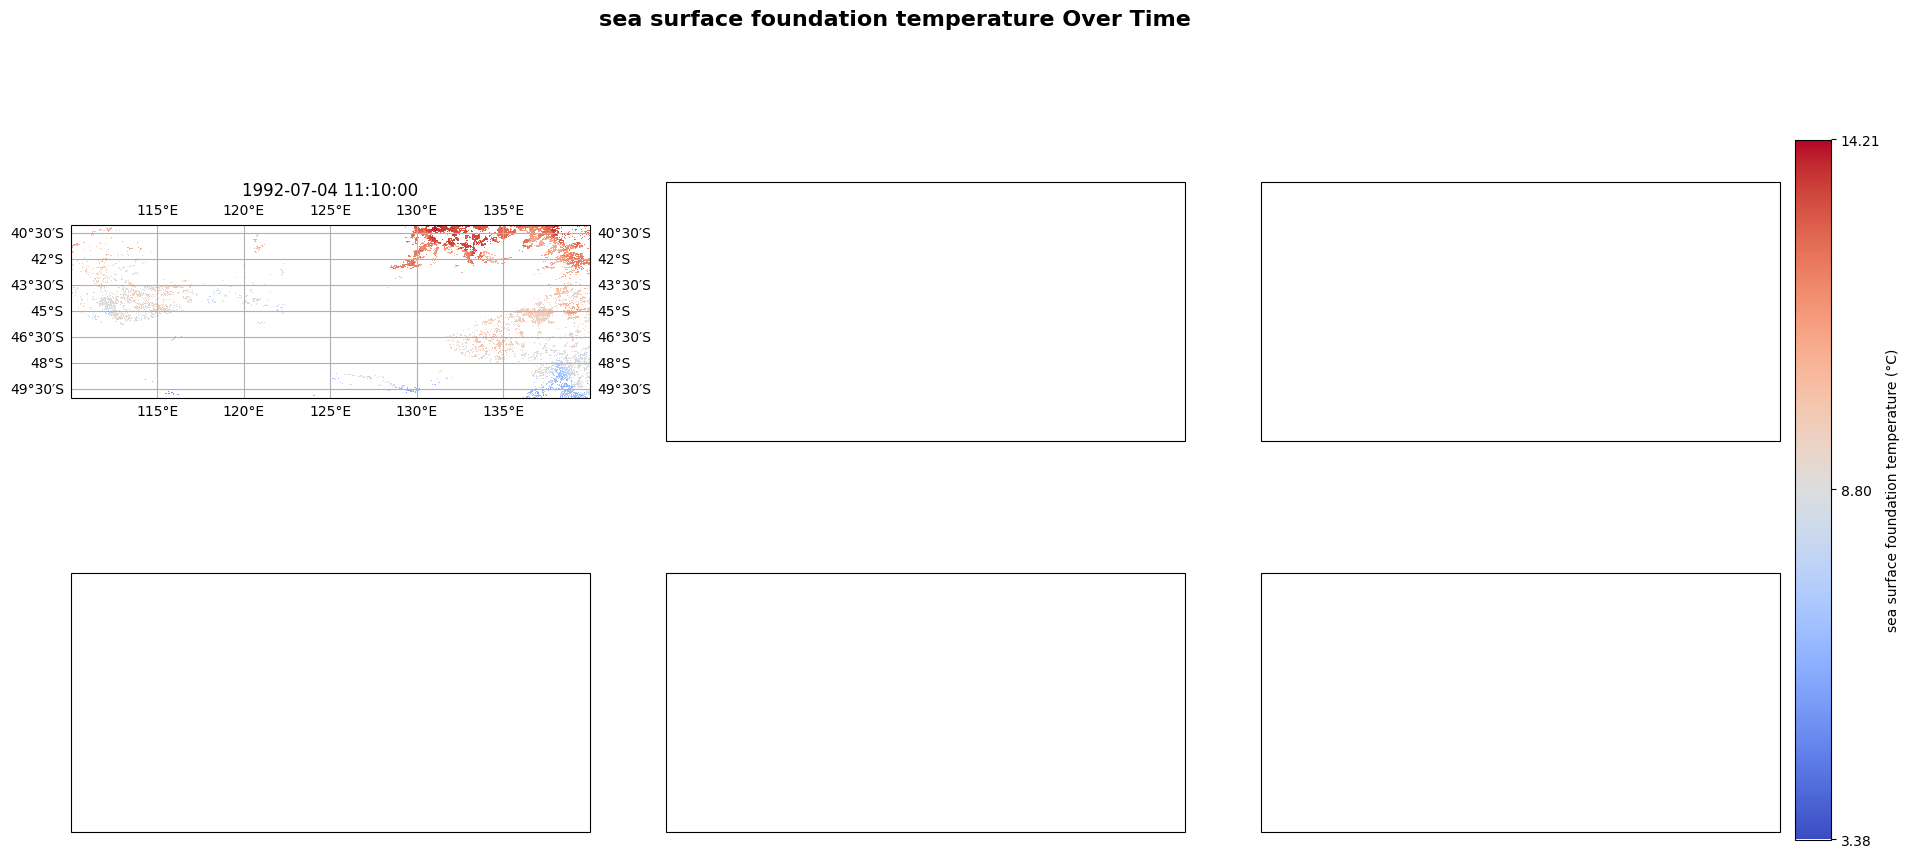

CPU times: user 1.45 s, sys: 591 ms, total: 2.04 s
Wall time: 2.89 s


In [9]:
%%time
time_series_df = aodn_dataset.plot_gridded_variable(var_name='sea_surface_temperature', 
                                                    date_start='1995-01-26',                                                
                                                    lon_name_override="lon", 
                                                    lat_name_override="lat", 
                                                    lon_slice=(110, 140), 
                                                    lat_slice=(-50, -40), 
                                                    n_days=6, 
                                                    coastline_resolution="110m", 
                                                    log_scale=False)

Nearest date in dataset: <xarray.DataArray 'time' ()> Size: 8B
array('1992-07-04T11:10:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 1992-07-04T11:10:00
Attributes:
    axis:           T
    comment:        A typical reference time for data
    long_name:      reference time of sst file
    standard_name:  time
Variable Long Name: sea ice fraction
No valid data for 1992-07-04 11:10:00, skipping this date.


ValueError: No valid data found in the selected range of dates and coordinates.

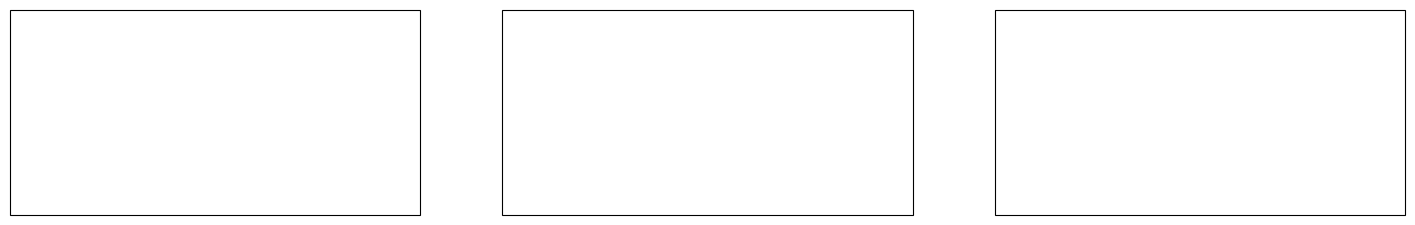

In [10]:
%%time
time_series_df = aodn_dataset.plot_gridded_variable(var_name='sea_ice_fraction', 
                                                    date_start='1995-01-26',                                                
                                                    lon_name_override="lon", 
                                                    lat_name_override="lat", 
                                                    lon_slice=(25, 60), 
                                                    lat_slice=(-72, -60), 
                                                    n_days=3, 
                                                    coastline_resolution="110m", 
                                                    log_scale=False)